### Image Classification Example

In [2]:
import pandas as pd
import numpy as np
import os, shutil

ETL - Loading partial dataset into directory

In [14]:
original_dir = '/Users/pauldefusco/Downloads/dogs-vs-cats'

In [4]:
base_dir = '/Users/pauldefusco/Documents/PythonWork/machine_learning_library/neural_networks/image_datasets/dogs-vs-cats-subset'

In [5]:
os.mkdir(base_dir)

In [6]:
train_dir = os.path.join(base_dir, 'train')

In [7]:
os.mkdir(train_dir)

In [8]:
val_dir = os.path.join(base_dir, 'val')

In [9]:
os.mkdir(val_dir)

In [10]:
test_dir = os.path.join(base_dir, 'test')

In [11]:
os.mkdir(test_dir)

In [12]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [16]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dir+'/train', fname)                        
    dst = os.path.join(train_cats_dir, fname)                              
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                       
    src = os.path.join(original_dir+'/train', fname)                        
    dst = os.path.join(val_cats_dir, fname)                      
    shutil.copyfile(src, dst)                                              

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]               
for fname in fnames:                                                       
    src = os.path.join(original_dir+'/train', fname)                        
    dst = os.path.join(test_cats_dir, fname)                               
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]                     
for fname in fnames:                                                       
    src = os.path.join(original_dir+'/train', fname)                        
    dst = os.path.join(train_dogs_dir, fname)                              
    shutil.copyfile(src, dst)                                              
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]               
for fname in fnames:                                                    
    src = os.path.join(original_dir+'/train', fname)                        
    dst = os.path.join(val_dogs_dir, fname)                         
    shutil.copyfile(src, dst)                                              

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]            
for fname in fnames:                                                       
    src = os.path.join(original_dir+'/train', fname)                        
    dst = os.path.join(test_dogs_dir, fname)                               
    shutil.copyfile(src, dst) 

Modeling Creation

In [19]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

###### Data Preparation

- Read picture files
- Decode JPEG content into RGB grids of pixels
- Convert RGB grids of pixels into floating-point tensors
- Rescale the pixel values to the [0,1] interval

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
val_generator = test_datagen.flow_from_directory(val_dir, 
                                                 target_size=(150, 150), 
                                                 batch_size=20, 
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [27]:
def generator():
    i = 0
    while True:
        i+=1
        yield i

for item in generator():
    print(item)
    if item > 4:
        break

1
2
3
4
5


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [30]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 117s 1s/step - loss: 0.6877 - acc: 0.5425 - val_loss: 0.6773 - val_acc: 0.5800
Epoch 2/30
100/100 [==============================] - 137s 1s/step - loss: 0.6706 - acc: 0.5975 - val_loss: 0.6763 - val_acc: 0.5670
Epoch 3/30
100/100 [==============================] - 141s 1s/step - loss: 0.6489 - acc: 0.6125 - val_loss: 0.6462 - val_acc: 0.6190
Epoch 4/30
100/100 [==============================] - 140s 1s/step - loss: 0.6248 - acc: 0.6525 - val_loss: 0.6207 - val_acc: 0.6480
Epoch 5/30
100/100 [==============================] - 132s 1s/step - loss: 0.5932 - acc: 0.6895 - val_loss: 0.6492 - val_acc: 0.6100
Epoch 6/30
100/100 [==============================] - 127s 1s/step - loss: 0.5649 - acc: 0.7015 - val_loss: 0.6119 - val_acc: 0.6590
Epoch 7/30
100/100 [==============================] - 138s 1s/step - loss: 0.5372 - acc: 0.7310 - val_loss: 0.5811 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 147s 1s/step - 

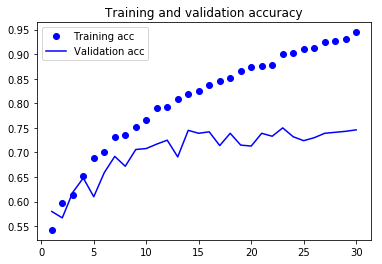

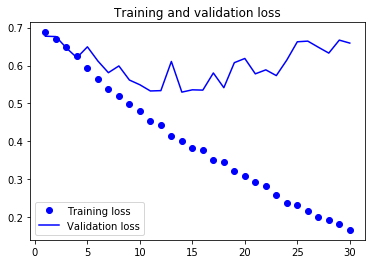

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()